# Generalities for DAEs and VAEs

* Import libraries
* Run on GPU if possible
* Create data loaders

In [2]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt

# create directory to save results
!mkdir results

# script parameters
batch_size = 128
log_interval = 100

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# create data loaders
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Neural Network classes

* Deterministic auto-encoder (DAE)
* Variational auto-encoder (VAE)


In [3]:
# Deterministic Auto-Encoder (DAE)
class DAE(nn.Module):

    # declare layers
    def __init__(self):
        super(DAE, self).__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    # encoder: one ReLU hidden layer of 400 nodes, one Linear output layer of 20 nodes
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h)

    # decoder: one ReLU hidden layer of 400 nodes, one sigmoid output layer of 784 nodes
    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    # forward: encoder followed by decoder
    def forward(self, x):
        z = self.encode(x.view(-1, 784))
        return self.decode(z)

# Variational Auto-Encoder (VAE)     
class VAE(nn.Module):

    # declare layers
    def __init__(self):
        super(VAE, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(784, 400)
        self.fc2_1 = nn.Linear(400, 20)
        self.fc2_2 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)


    # Encoder: one ReLU hidden layer of 400 nodes, two Linear output layers of 20 nodes (means and log_variances)
    # Input: image (array of size 784)
    # Output: means (array of size 20), log_variances (array of size 20)
    def encode(self, x):

        # dummy assignment until this function is filled in
        h1 = F.relu(self.fc1(x))
        means = self.fc2_1(h1)
        log_variances = self.fc2_2(h1)
        return means, log_variances
        

    # Reparameterization:
    #
    # Let eps be samples from a Normal(0,1)
    # Input: means (array of size 20), log_variances (array of size 20)
    # Output: embedding (array of size 20 corresponding to means + eps * exponential(log_variances/2))
    def reparameterize(self, means, log_variances):

        # dummy assignment until this function is filled in
        std = torch.exp(0.5 * log_variances)
        eps = torch.randn_like(std)
        embedding = means + eps * std
        return embedding

    # Decoder: one ReLU hidden layer of 400 nodes, one sigmoid output layer of 784 nodes
    # Input: embedding (array of size 20)
    # Output: probability of reconstructed image (array of size 784)
    def decode(self, z):

        # dummy assignment until this function is filled in
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    # Function forward: encoder, reparameterize, decoder
    # Input: image
    # Output: probability of reconstructed image, means, log_variances
    def forward(self, x):

        # dummy assignment until this function is filled in
        means, log_variances = self.encode(x.view(-1, 784))
        z = self.reparameterize(means, log_variances)
        return self.decode(z), means, log_variances

# Loss Functions

In [4]:
# DAE Loss Function
# Reconstruction loss: binary cross entropy
#
# Inputs:
#    reconstructed_x: reconstructed image
#    x: image
#
# Output:
#    BCE: binary cross entropy  
#
def dae_loss_function(reconstructed_x, x):
    BCE = F.binary_cross_entropy(reconstructed_x, x.view(-1, 784), reduction='sum')
    return BCE

# VAE Loss Function
# Reconstruction loss: binary cross entropy
# KL divergence loss: -0.5 * sum(1 + log_variances - means^2 - exp(log_variances))
#       see Appendix B from VAE paper:
#       Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
#       https://arxiv.org/abs/1312.6114
#
# Inputs: 
#    reconstructed_x: reconstructed image
#    x: image
#    means: array of size 20
#    log_variances: array of size 20
#
# Outputs:
#    total_loss: binary cross entropy + KL divergence (scalar)
#    BCE: binary cross entropy (scalar)
#
def vae_loss_function(reconstructed_x, x, means, log_variances):

    # dummy assignment until this function is filled in
    BCE = F.binary_cross_entropy(reconstructed_x, x.view(-1, 784), reduction='sum')
    KL_divergence = -0.5 * torch.sum(1 + log_variances - means.pow(2) - log_variances.exp())
    total_loss = BCE + KL_divergence
    return total_loss, BCE

# Training

In [5]:
# DAE Training
#
# Inputs:
#    epoch: epoch #
#    model: DAE neural network
#    optimizer: DAE optimizer
#
# Outputs:
#    average_train_BCE: binary cross entropy (scalar)
#
def dae_train(epoch, model, optimizer):
    train_BCE = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch = model(data)
        loss = dae_loss_function(recon_batch, data)
        loss.backward()
        train_BCE += loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    average_train_BCE = train_BCE / len(train_loader.dataset)
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, average_train_BCE))
    return average_train_BCE

# VAE Training
#
# Inputs:
#    epoch: epoch #
#    model: VAE neural network
#    optimizer: VAE optimizer
#
# Outputs:
#    average_train_loss: binary cross entropy + KL divergence (scalar)
#    average_train_BCE: binary cross entropy (scalar)
#
def vae_train(epoch, model, optimizer):

    # dummy assignment until this function is filled in
    train_loss = 0
    train_BCE = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, means, log_variances = model(data)
        loss, BCE = vae_loss_function(recon_batch, data, means, log_variances)
        loss.backward()
        train_loss += loss.item()
        train_BCE += BCE.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f} Average BCE loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset), train_BCE / len(train_loader.dataset)))
    average_train_loss = train_loss / len(train_loader.dataset)
    average_train_BCE = train_BCE / len(train_loader.dataset)
    return average_train_loss, average_train_BCE



# Testing

In [8]:
# DAE Test
#
# Inputs:
#    epoch: epoch #
#    model: DAE neural network
#
# Outputs:
#    average_test_BCE: binary cross entropy (scalar)
#
def dae_test(epoch, model):
    model.eval()
    test_BCE = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch = model(data)
            test_BCE += dae_loss_function(recon_batch, data).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)
                print('Sample of reconstructed images (top row are targets and bottom row are reconstructions)')
                display(Image('results/reconstruction_' + str(epoch) + '.png'))

    average_test_BCE = test_BCE / len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(average_test_BCE))
    return average_test_BCE

# VAE Test
#
# Inputs:
#    epoch: epoch #
#    model: VAE neural network
#
# Outputs:
#    average_test_loss: binary cross entropy + KL divergence (scalar)
#    average_test_BCE: binary cross entropy (scalar)
#
def vae_test(epoch, model):

    # dummy assignment until this function is filled in
    model.eval()
    test_loss = 0
    test_BCE = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, means, log_variances = model(data)
            loss, BCE = vae_loss_function(recon_batch, data, means, log_variances)
            test_loss += loss
            test_BCE += BCE
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)

    average_test_loss = test_loss / len(test_loader.dataset)
    average_test_BCE = test_BCE / len(test_loader.dataset)
    print('====> Test set loss: {:.4f} Test set BCE loss: {:.4f}'.format(test_loss, test_BCE))
    return average_test_loss, average_test_BCE


# Main

Train Epoch: 1 [0/60000 (0%)]	Loss: 544.079224
Train Epoch: 1 [12800/60000 (21%)]	Loss: 142.474518
Train Epoch: 1 [25600/60000 (43%)]	Loss: 114.912010
Train Epoch: 1 [38400/60000 (64%)]	Loss: 103.409103
Train Epoch: 1 [51200/60000 (85%)]	Loss: 91.170929
====> Epoch: 1 Average loss: 129.6326
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


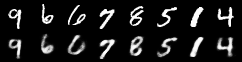

====> Test set loss: 87.0340
Sample of generated images


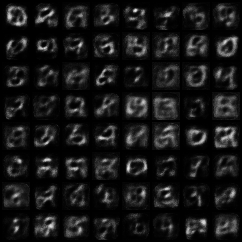



Train Epoch: 2 [0/60000 (0%)]	Loss: 89.183655
Train Epoch: 2 [12800/60000 (21%)]	Loss: 82.275009
Train Epoch: 2 [25600/60000 (43%)]	Loss: 81.790283
Train Epoch: 2 [38400/60000 (64%)]	Loss: 80.985878
Train Epoch: 2 [51200/60000 (85%)]	Loss: 77.167969
====> Epoch: 2 Average loss: 82.4101
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


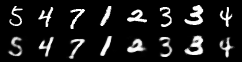

====> Test set loss: 77.7982
Sample of generated images


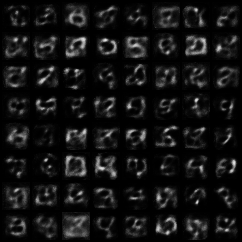



Train Epoch: 3 [0/60000 (0%)]	Loss: 76.635696
Train Epoch: 3 [12800/60000 (21%)]	Loss: 71.639275
Train Epoch: 3 [25600/60000 (43%)]	Loss: 75.944695
Train Epoch: 3 [38400/60000 (64%)]	Loss: 81.006973
Train Epoch: 3 [51200/60000 (85%)]	Loss: 73.761063
====> Epoch: 3 Average loss: 76.9880
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


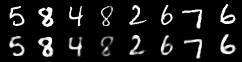

====> Test set loss: 74.7811
Sample of generated images


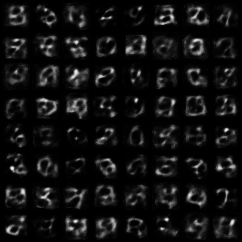



Train Epoch: 4 [0/60000 (0%)]	Loss: 79.628799
Train Epoch: 4 [12800/60000 (21%)]	Loss: 73.372192
Train Epoch: 4 [25600/60000 (43%)]	Loss: 74.994995
Train Epoch: 4 [38400/60000 (64%)]	Loss: 72.789337
Train Epoch: 4 [51200/60000 (85%)]	Loss: 72.325768
====> Epoch: 4 Average loss: 74.2532
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


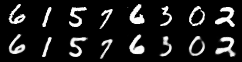

====> Test set loss: 72.8192
Sample of generated images


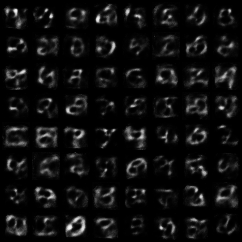



Train Epoch: 5 [0/60000 (0%)]	Loss: 74.733177
Train Epoch: 5 [12800/60000 (21%)]	Loss: 69.564331
Train Epoch: 5 [25600/60000 (43%)]	Loss: 69.852722
Train Epoch: 5 [38400/60000 (64%)]	Loss: 73.557755
Train Epoch: 5 [51200/60000 (85%)]	Loss: 72.793526
====> Epoch: 5 Average loss: 72.4644
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


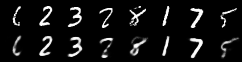

====> Test set loss: 71.2647
Sample of generated images


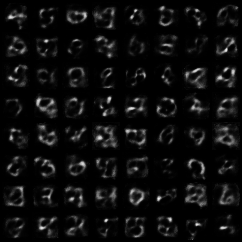



Train Epoch: 6 [0/60000 (0%)]	Loss: 72.791092
Train Epoch: 6 [12800/60000 (21%)]	Loss: 71.643890
Train Epoch: 6 [25600/60000 (43%)]	Loss: 69.007812
Train Epoch: 6 [38400/60000 (64%)]	Loss: 69.778687
Train Epoch: 6 [51200/60000 (85%)]	Loss: 69.837219
====> Epoch: 6 Average loss: 71.1650
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


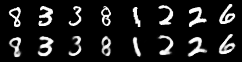

====> Test set loss: 70.2405
Sample of generated images


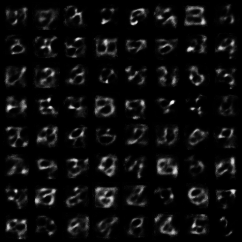



Train Epoch: 7 [0/60000 (0%)]	Loss: 73.457977
Train Epoch: 7 [12800/60000 (21%)]	Loss: 68.527496
Train Epoch: 7 [25600/60000 (43%)]	Loss: 71.003235
Train Epoch: 7 [38400/60000 (64%)]	Loss: 71.171448
Train Epoch: 7 [51200/60000 (85%)]	Loss: 72.813507
====> Epoch: 7 Average loss: 70.1633
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


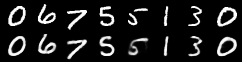

====> Test set loss: 69.5877
Sample of generated images


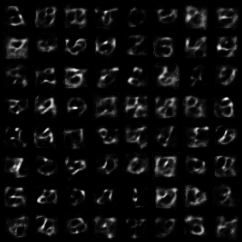



Train Epoch: 8 [0/60000 (0%)]	Loss: 67.300842
Train Epoch: 8 [12800/60000 (21%)]	Loss: 70.515671
Train Epoch: 8 [25600/60000 (43%)]	Loss: 70.358856
Train Epoch: 8 [38400/60000 (64%)]	Loss: 71.302376
Train Epoch: 8 [51200/60000 (85%)]	Loss: 69.139145
====> Epoch: 8 Average loss: 69.3724
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


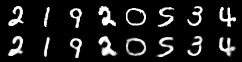

====> Test set loss: 68.8336
Sample of generated images


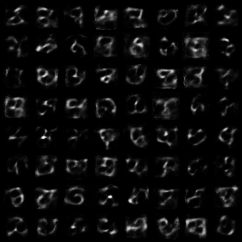



Train Epoch: 9 [0/60000 (0%)]	Loss: 67.897209
Train Epoch: 9 [12800/60000 (21%)]	Loss: 68.743362
Train Epoch: 9 [25600/60000 (43%)]	Loss: 69.932266
Train Epoch: 9 [38400/60000 (64%)]	Loss: 67.760429
Train Epoch: 9 [51200/60000 (85%)]	Loss: 67.080269
====> Epoch: 9 Average loss: 68.7182
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


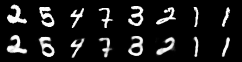

====> Test set loss: 68.3622
Sample of generated images


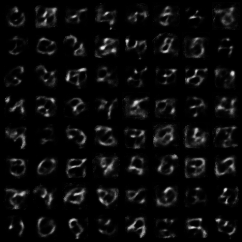



Train Epoch: 10 [0/60000 (0%)]	Loss: 70.439972
Train Epoch: 10 [12800/60000 (21%)]	Loss: 69.970779
Train Epoch: 10 [25600/60000 (43%)]	Loss: 71.366196
Train Epoch: 10 [38400/60000 (64%)]	Loss: 69.803726
Train Epoch: 10 [51200/60000 (85%)]	Loss: 65.675369
====> Epoch: 10 Average loss: 68.1862
Sample of reconstructed images (top row are targets and bottom row are reconstructions)


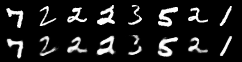

====> Test set loss: 67.8944
Sample of generated images


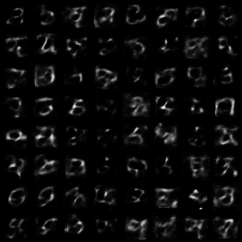

In [9]:
# train and test DAE
epochs = 10
dae_average_train_BCE = []
dae_average_test_BCE = []
dae_model = DAE().to(device)
dae_optimizer = optim.Adam(dae_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    average_train_BCE = dae_train(epoch, dae_model, dae_optimizer)
    dae_average_train_BCE.append(average_train_BCE)
    average_test_BCE = dae_test(epoch, dae_model)
    dae_average_test_BCE.append(average_test_BCE)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = dae_model.decode(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')


Train Epoch: 1 [0/60000 (0%)]	Loss: 547.137268
Train Epoch: 1 [12800/60000 (21%)]	Loss: 184.179443
Train Epoch: 1 [25600/60000 (43%)]	Loss: 153.451660
Train Epoch: 1 [38400/60000 (64%)]	Loss: 140.924179
Train Epoch: 1 [51200/60000 (85%)]	Loss: 137.166794
====> Epoch: 1 Average loss: 164.1701 Average BCE loss: 148.3842
====> Test set loss: 1276008.1250 Test set BCE loss: 1065719.0000
Sample of generated images


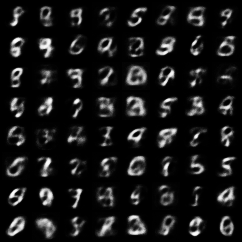



Train Epoch: 2 [0/60000 (0%)]	Loss: 130.063782
Train Epoch: 2 [12800/60000 (21%)]	Loss: 122.604759
Train Epoch: 2 [25600/60000 (43%)]	Loss: 121.933929
Train Epoch: 2 [38400/60000 (64%)]	Loss: 124.793076
Train Epoch: 2 [51200/60000 (85%)]	Loss: 120.505157
====> Epoch: 2 Average loss: 121.3241 Average BCE loss: 98.8101
====> Test set loss: 1156660.8750 Test set BCE loss: 917945.8750
Sample of generated images


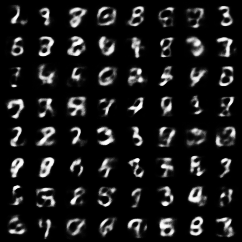



Train Epoch: 3 [0/60000 (0%)]	Loss: 116.582695
Train Epoch: 3 [12800/60000 (21%)]	Loss: 113.776604
Train Epoch: 3 [25600/60000 (43%)]	Loss: 116.075356
Train Epoch: 3 [38400/60000 (64%)]	Loss: 117.593353
Train Epoch: 3 [51200/60000 (85%)]	Loss: 111.454422
====> Epoch: 3 Average loss: 114.5271 Average BCE loss: 90.4015
====> Test set loss: 1116229.8750 Test set BCE loss: 871845.1875
Sample of generated images


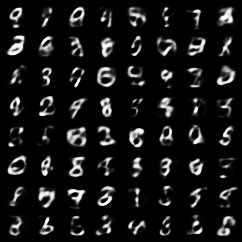



Train Epoch: 4 [0/60000 (0%)]	Loss: 110.041199
Train Epoch: 4 [12800/60000 (21%)]	Loss: 109.793472
Train Epoch: 4 [25600/60000 (43%)]	Loss: 111.373871
Train Epoch: 4 [38400/60000 (64%)]	Loss: 108.190613
Train Epoch: 4 [51200/60000 (85%)]	Loss: 106.815735
====> Epoch: 4 Average loss: 111.6380 Average BCE loss: 86.9926
====> Test set loss: 1095520.5000 Test set BCE loss: 847338.0625
Sample of generated images


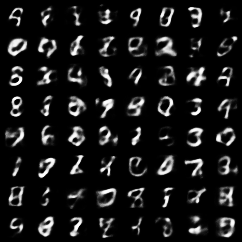



Train Epoch: 5 [0/60000 (0%)]	Loss: 113.370392
Train Epoch: 5 [12800/60000 (21%)]	Loss: 112.026703
Train Epoch: 5 [25600/60000 (43%)]	Loss: 109.869858
Train Epoch: 5 [38400/60000 (64%)]	Loss: 110.252495
Train Epoch: 5 [51200/60000 (85%)]	Loss: 110.574257
====> Epoch: 5 Average loss: 109.9034 Average BCE loss: 84.9927
====> Test set loss: 1086047.2500 Test set BCE loss: 834126.1250
Sample of generated images


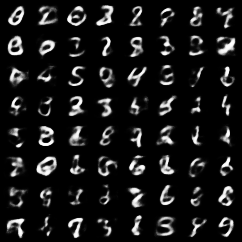



Train Epoch: 6 [0/60000 (0%)]	Loss: 111.327057
Train Epoch: 6 [12800/60000 (21%)]	Loss: 108.798325
Train Epoch: 6 [25600/60000 (43%)]	Loss: 105.936844
Train Epoch: 6 [38400/60000 (64%)]	Loss: 106.043884
Train Epoch: 6 [51200/60000 (85%)]	Loss: 110.588036
====> Epoch: 6 Average loss: 108.7520 Average BCE loss: 83.6953
====> Test set loss: 1076566.7500 Test set BCE loss: 818465.7500
Sample of generated images


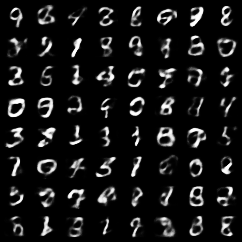



Train Epoch: 7 [0/60000 (0%)]	Loss: 107.345367
Train Epoch: 7 [12800/60000 (21%)]	Loss: 111.356461
Train Epoch: 7 [25600/60000 (43%)]	Loss: 110.622162
Train Epoch: 7 [38400/60000 (64%)]	Loss: 104.357574
Train Epoch: 7 [51200/60000 (85%)]	Loss: 112.976906
====> Epoch: 7 Average loss: 107.8910 Average BCE loss: 82.7208
====> Test set loss: 1067522.2500 Test set BCE loss: 811239.0000
Sample of generated images


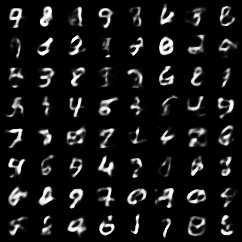



Train Epoch: 8 [0/60000 (0%)]	Loss: 110.719696
Train Epoch: 8 [12800/60000 (21%)]	Loss: 109.639351
Train Epoch: 8 [25600/60000 (43%)]	Loss: 110.560951
Train Epoch: 8 [38400/60000 (64%)]	Loss: 106.496048
Train Epoch: 8 [51200/60000 (85%)]	Loss: 108.694984
====> Epoch: 8 Average loss: 107.2338 Average BCE loss: 81.9872
====> Test set loss: 1064453.1250 Test set BCE loss: 816726.9375
Sample of generated images


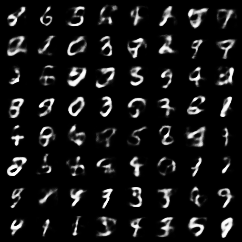



Train Epoch: 9 [0/60000 (0%)]	Loss: 104.097458
Train Epoch: 9 [12800/60000 (21%)]	Loss: 107.983604
Train Epoch: 9 [25600/60000 (43%)]	Loss: 103.371750
Train Epoch: 9 [38400/60000 (64%)]	Loss: 107.133430
Train Epoch: 9 [51200/60000 (85%)]	Loss: 104.569122
====> Epoch: 9 Average loss: 106.6918 Average BCE loss: 81.3893
====> Test set loss: 1060975.0000 Test set BCE loss: 811029.6250
Sample of generated images


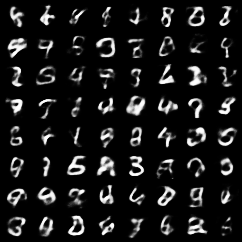



Train Epoch: 10 [0/60000 (0%)]	Loss: 107.715012
Train Epoch: 10 [12800/60000 (21%)]	Loss: 106.804550
Train Epoch: 10 [25600/60000 (43%)]	Loss: 110.568367
Train Epoch: 10 [38400/60000 (64%)]	Loss: 105.597504
Train Epoch: 10 [51200/60000 (85%)]	Loss: 109.042366
====> Epoch: 10 Average loss: 106.2704 Average BCE loss: 80.9346
====> Test set loss: 1054071.7500 Test set BCE loss: 797399.3125
Sample of generated images


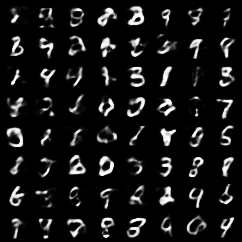

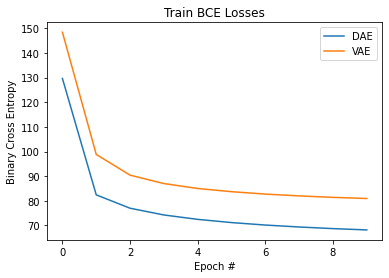

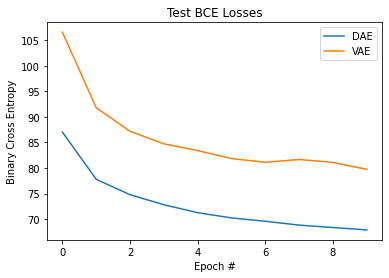

In [10]:
# train and test VAE
epochs = 10
vae_average_train_losses = []
vae_average_train_BCE = []
vae_average_test_losses = []
vae_average_test_BCE = []
vae_model = VAE().to(device)
vae_optimizer = optim.Adam(vae_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    average_train_loss, average_train_BCE = vae_train(epoch, vae_model, vae_optimizer)
    vae_average_train_losses.append(average_train_loss)
    vae_average_train_BCE.append(average_train_BCE)
    average_test_loss, average_test_BCE = vae_test(epoch, vae_model)
    vae_average_test_losses.append(average_test_loss)
    vae_average_test_BCE.append(average_test_BCE)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = vae_model.decode(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

# Plot Train BCE Losses
plt.plot(dae_average_train_BCE)
plt.plot(vae_average_train_BCE)
plt.title('Train BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['DAE','VAE'], loc='upper right')
plt.show()

# Plot Test BCE Losses
plt.plot(dae_average_test_BCE)
plt.plot(vae_average_test_BCE)
plt.title('Test BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['DAE','VAE'], loc='upper right')
plt.show()

For DAE, binary cross entropy is the only data it wants to minimize. However, for VAE, the object we would like to minimize is (binary cross entropy - c KL Divergence). So the BCE have made some tradeoff for KLD.